# Introduction to Python IV

Data Visualization Deep Dive

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# new libraries we will be using in this notebook:
import seaborn as sns
import plotly.express as px

## Matplotlib - Recap

Text(0, 0.5, 'X squared')

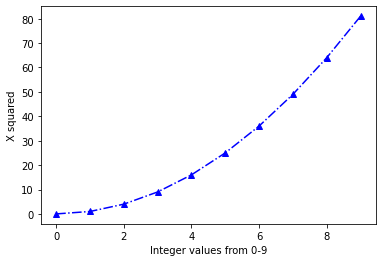

In [2]:
#Line Plots
x = np.arange(10)
y = x**2
plt.plot(x,y, 'b^-.')
plt.xlabel("Integer values from 0-9")
plt.ylabel("X squared")

Text(0, 0.5, 'no. of pets')

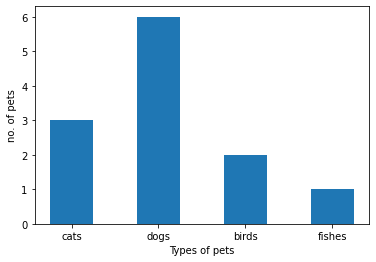

In [3]:
#Bar Plots
plt.bar(["cats", "dogs", "birds", "fishes"], [3,6,2,1], width=0.5)
plt.xlabel("Types of pets")
plt.ylabel("no. of pets")

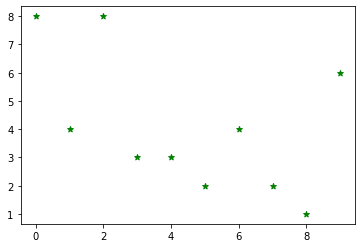

In [4]:
#Scatter Plots
plt.scatter(np.arange(10), np.random.randint(1,9, 10), c = "green", marker = "*")

## Subplots with matplotlib

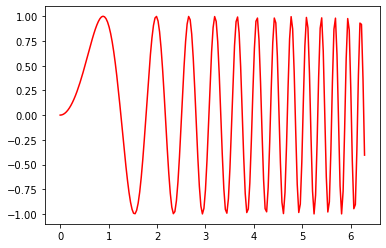

In [5]:
x1 = np.linspace(0, 2*np.pi, 200)
y1 = np.sin(2*(x1**2))
plt.plot(x1,y1, 'r')

Text(0.5, 1.0, 'testing')

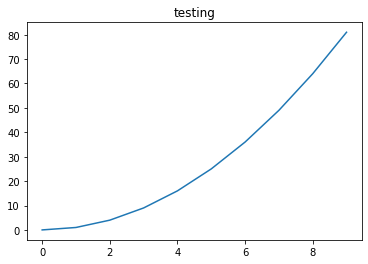

In [6]:
fig, ax = plt.subplots()
#print(fig, ax)
ax.plot(x,y)
#ax.plot(x1,y1) ## 2 plots doesn't work
ax.set_title("testing")

Text(0.5, 1.0, 'testing 1')

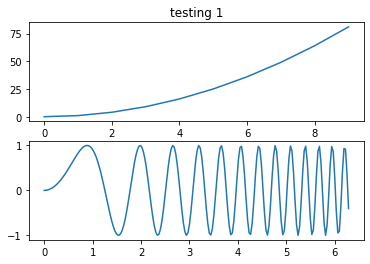

In [7]:
fig1, ax1 = plt.subplots(2)
#print(fig, ax)
ax1[0].plot(x,y)
ax1[1].plot(x1,y1) ## 2 plots work now
ax1[0].set_title("testing 1")
#ax1[1].set_title("testing 2")


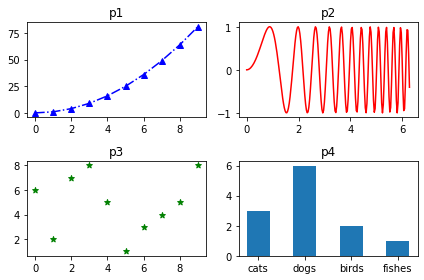

In [8]:
fig2, ax2 = plt.subplots(2,2)
ax2[0,0].plot(x,y, 'b^-.')
ax2[0,0].set_title("p1")
ax2[0,1].plot(x1,y1, 'r')
ax2[0,1].set_title("p2")
ax2[1,1].bar(["cats", "dogs", "birds", "fishes"], [3,6,2,1], width=0.5)
ax2[1,1].set_title("p4")
ax2[1,0].scatter(np.arange(10), np.random.randint(1,9, 10), c = "green", marker = "*")
ax2[1,0].set_title("p3")
fig2.tight_layout() #readjusts the layout

- Can set X and Y labels for each Plot
- Share Axes on X and Y
- Can Set Titles

## Plotting images and matrices with matplotlib

#### reference: http://www.math.buffalo.edu/~badzioch/MTH337/PT/PT-image_processing/PT-image_processing.html

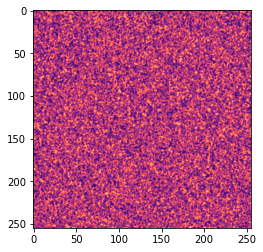

In [9]:
np.random.seed(2023)
mat2 = np.random.randint(-255,255,65025).reshape(255,255)
#plt.imshow(mat2)
#plt.imshow(mat2, interpolation = "bicubic") ## bilinear, gaussian, lanczos, bicubic
plt.imshow(mat2, interpolation = "bicubic", cmap = 'magma') #cmaps: viridis, plasma, inferno, magma
#plt.colorbar() ##Add colorbar for to show values

In [10]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/3d/Fesoj_-_Papilio_machaon_%28by%29.jpg -O butterfly.JPG

--2023-06-01 08:54:54--  https://upload.wikimedia.org/wikipedia/commons/3/3d/Fesoj_-_Papilio_machaon_%28by%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511073 (499K) [image/jpeg]
Saving to: ‘butterfly.JPG’

butterfly.JPG       100%[===================>] 499.09K  --.-KB/s    in 0.07s   

2023-06-01 08:54:54 (6.54 MB/s) - ‘butterfly.JPG’ saved [511073/511073]



<class 'numpy.ndarray'>
(931, 931, 3)


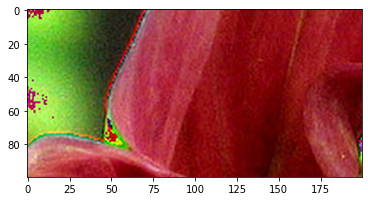

In [11]:
butterfly = plt.imread("butterfly.JPG")
print(type(butterfly))
print(butterfly.shape)
#plt.imshow(butterfly)
#plt.imshow(butterfly, interpolation= "bilinear")
plt.imshow(butterfly[200:300,100:300]*2, interpolation = "lanczos")

- Another Matrix visualization function: matshow()

## Density plots matplotlib/seaborn

### The "taxis" dataset

In [12]:
df = sns.load_dataset('taxis')
df

pickup              dropoff  passengers  distance  fare  \
0     2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1     2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2     2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3     2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4     2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
...                   ...                  ...         ...       ...   ...   
6428  2019-03-31 09:51:53  2019-03-31 09:55:27           1      0.75   4.5   
6429  2019-03-31 17:38:00  2019-03-31 18:34:23           1     18.74  58.0   
6430  2019-03-23 22:55:18  2019-03-23 23:14:25           1      4.14  16.0   
6431  2019-03-04 10:09:25  2019-03-04 10:14:29           1      1.12   6.0   
6432  2019-03-13 19:31:22  2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  
0                  UN/Turtle Bay South      Manhattan       Manhattan  
1                Upper West Side South      Manhattan       Manhattan  
2                         West Village      Manhattan       Manhattan  
3                       Yorkville West      Manhattan       Manhattan  
4                       Yorkville West      Manhattan       Manhattan  
...                                ...            ...             ...  
6428              Central Harlem North      Manhattan       Manhattan  
6429  East Concourse/Concourse Village         Queens           Bronx  
6430                    Bushwick North       Brooklyn        Brooklyn  
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn  
6432                   Windsor Terrace       Brooklyn        Brooklyn  

[6433 rows x 14 columns]

Questions we might want to answer based on this data:
* How does the fare depend on other factors like travel distance, number of passengers, time of day, and pickup zone? 
* What are the most common pickup and dropoff locations in the data? 
* What factors influence the travel time? 
* Do green cabs charge bigger fares than yellow cabs? 
* _Can you think of any other questions?_ 

Distribution plots / density plots can help us start to answer these questions. 

#### **Histogram for 1D data**

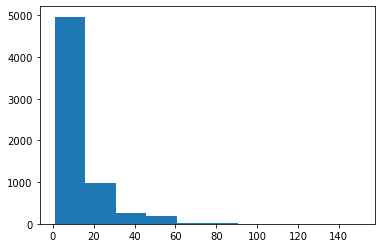

In [13]:
_ = plt.hist(df.fare)

Problems: 
* No labels
* Not enough bins

Let's improve this histogram

Text(0, 0.5, 'Count')

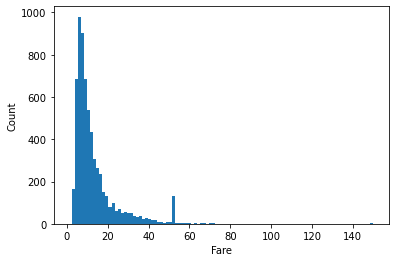

In [14]:
plt.hist(df.fare, bins=100)
plt.xlabel('Fare')
plt.ylabel('Count')

That's much better, but there's a lot of wasted space due to some very high Fare values. Let's manually set the limit to get rid of this.

(0.0, 80.0)

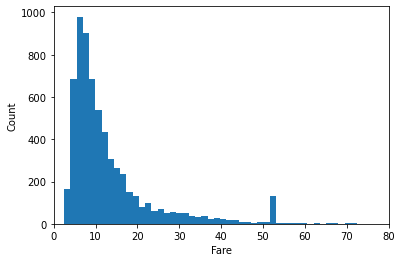

In [15]:
plt.hist(df.fare, bins=100)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(0,80)

Given the nature of the distribution, we may wish to put the x-axis on a log scale.

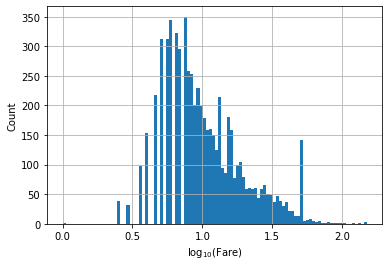

In [16]:
# we can do this by taking the log of the fare, in which case the bins are uniform in log space...
plt.hist(np.log10(df.fare), bins=100)
plt.xlabel(r'$\log_{10}(\mathrm{Fare})$')
plt.ylabel('Count')
plt.grid()

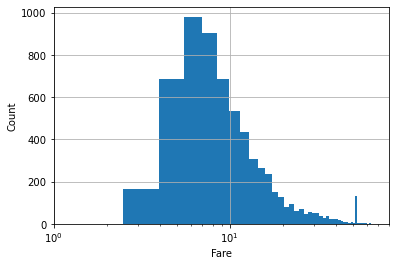

In [17]:
# or by converting the axis to log-scale after the fact. In this case, bins are non-uniform
# in log space.
plt.hist(df.fare, bins=100)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(1,80)
plt.semilogx()
plt.grid()

By default, `hist` gives number of samples for the y axis. Sometimes, we want the percentage of samples in the bin instead. 

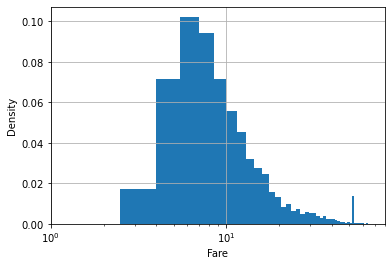

In [18]:
plt.hist(df.fare, bins=100, density=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.xlim(1,80)
plt.semilogx()
plt.grid()

Sometimes we want the log-density instead: 

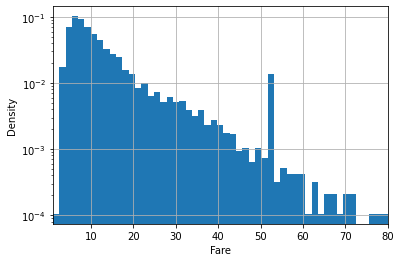

In [19]:
plt.hist(df.fare, bins=100, density=True, log=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.xlim(1,80)
plt.grid()

#### **Kernel Density Estimation** 
Sometimes we want smooth approximations to our data distribution. Smooth approximations can show us the underlying pattern while removing noise due to small sample size. Kernel Density Estimation is just a fancy name for a method of fitting smooth approximations to data distributions. The `seaborn` library, which we loaded with alias `sns` provides convenient methods for fitting and plotting kernel density estimates. 

<AxesSubplot:xlabel='fare', ylabel='Density'>

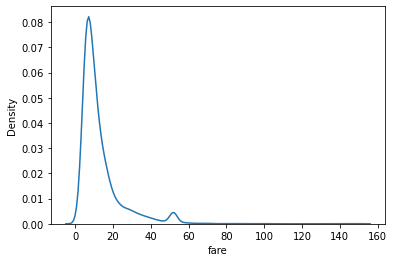

In [20]:
sns.kdeplot(data=df, x='fare')

Seaborn functions like kdeplot have about a jillion arguments

In [21]:
#sns.kdeplot?

But seaborn uses matplotlib under the hood. So we can use some matplotlib commands to customize the look.

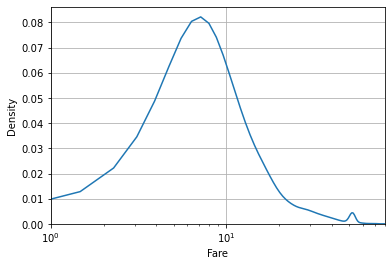

In [22]:
sns.kdeplot(data=df, x='fare')
plt.xlabel('Fare')
plt.xlim(1,80)
plt.semilogx()
plt.grid()

In KDE, it's important to correctly set the smoothness parameter called `bw_method` for bin width method. Too large and you remove important structure in your data. Too small and you are fitting the noise. 

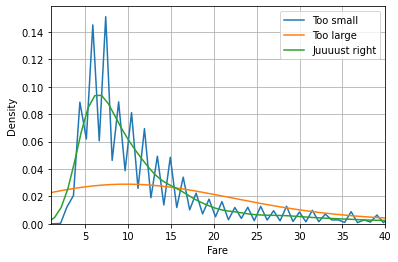

In [23]:
sns.kdeplot(data=df, x='fare', bw_method=0.01, label='Too small')
sns.kdeplot(data=df, x='fare', bw_method=1, label='Too large')
sns.kdeplot(data=df, x='fare', bw_method=0.1, label='Juuuust right')
plt.xlabel('Fare')
plt.xlim(1,40)
plt.grid()
plt.legend()

It can be useful to compare with a histogram to make sure you're getting it right: 

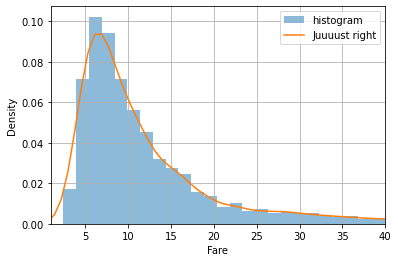

In [24]:
plt.hist(df.fare, bins=100, label='histogram', density=True, alpha=0.5)
sns.kdeplot(data=df, x='fare', bw_method=0.1, label='Juuuust right')
plt.xlabel('Fare')
plt.xlim(1,40)
plt.grid()
plt.legend()

Seaborn makes it easy to group our data:

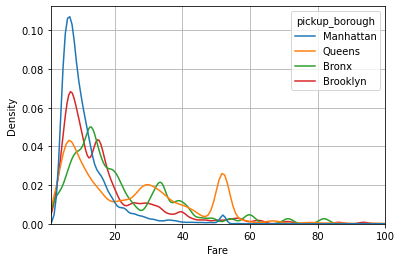

In [25]:
df.passengers = df.passengers.astype(str)
sns.kdeplot(data=df, x='fare', hue='pickup_borough', bw_method=0.1, common_norm=False)
plt.xlabel('Fare')
plt.xlim(1,100)
plt.grid()

#### **Kernel Density Estimation in 2D** 

Kernel Density Estimation is especially useful in 2D. 

Let's return to the iris dataset and take, for instance, the distribution of `petal_length` and `sepal_length`

In [26]:
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

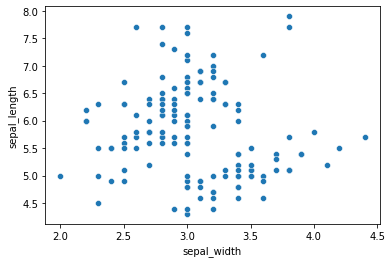

In [27]:
sns.scatterplot(data=df, x='sepal_width', y='sepal_length')

It looks like there are two groupings in the data. We can use KDE in two dimensions to visualize the distribution more clearly.

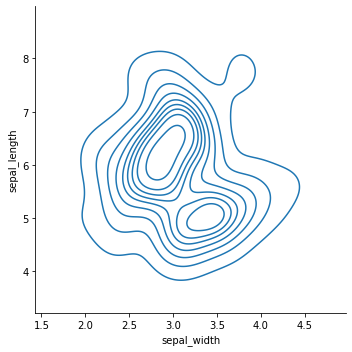

In [28]:
sns.displot(df, x='sepal_width', y='sepal_length', kind='kde')

The data looks bi-modal. That is, there are two peaks. What could explain these two peaks?  

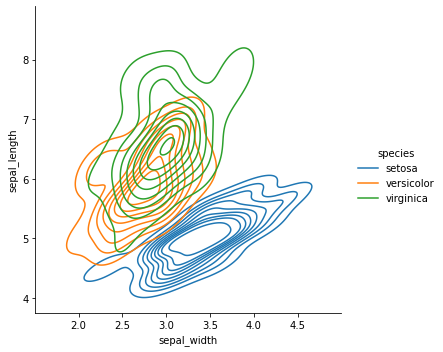

In [29]:
sns.displot(df, x='sepal_width', y='sepal_length', hue='species', kind='kde')

Now we can clearly see where the two peaks are coming from. 

There are many ways to style the kde plots. 

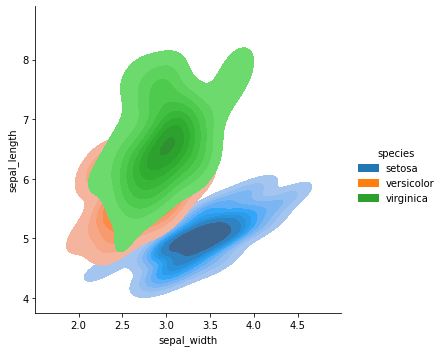

In [30]:
sns.displot(data=df, x='sepal_width', y='sepal_length', hue='species', fill=True, kind='kde')

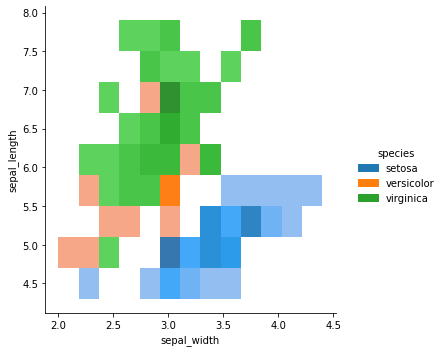

In [31]:
sns.displot(data=df, x='sepal_width', y='sepal_length', hue='species')

Sometimes it's useful to see the marginal distributions

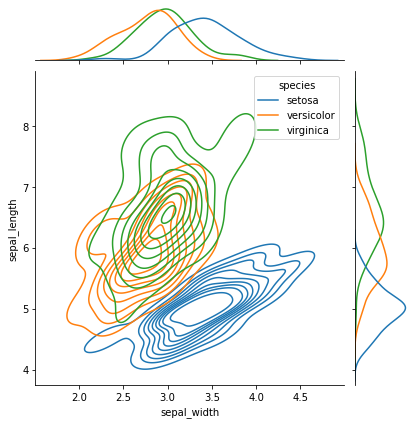

In [32]:
sns.jointplot(
    data=df,
    x='sepal_width', y='sepal_length', hue='species',
    kind="kde"
)

## Interactive plotting with Plotly
So far we have seen static visualizations made with matplotlib and seaborn. Though you can create interactive plots with these tools, it is a lot of work. 

Plotly is designed to be interactive out of the box.

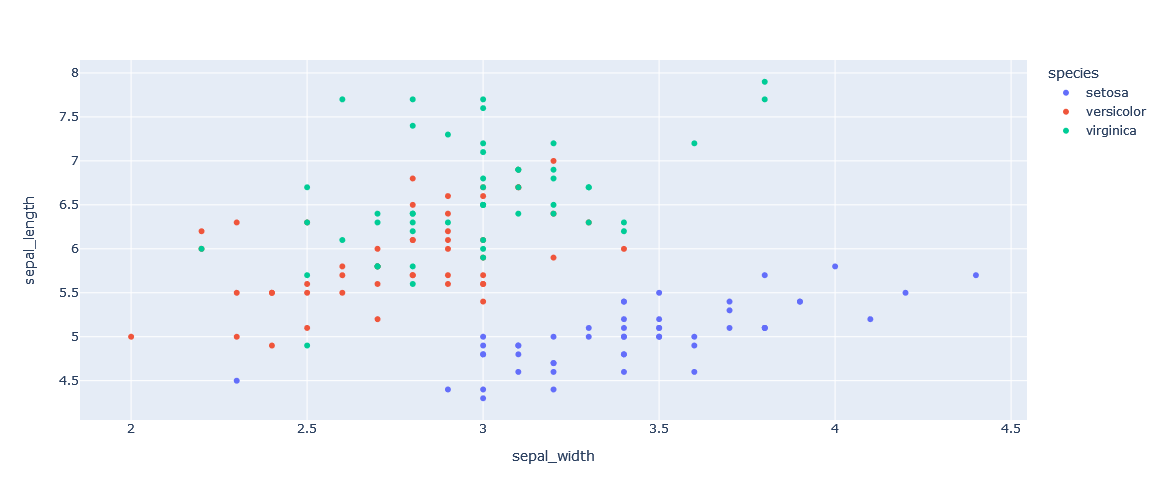

In [33]:
px.scatter(df, x='sepal_width', y='sepal_length', color='species', height=500, width=700)

Plotly has many impressive features. For instance, we can easily add groups and margin plots:

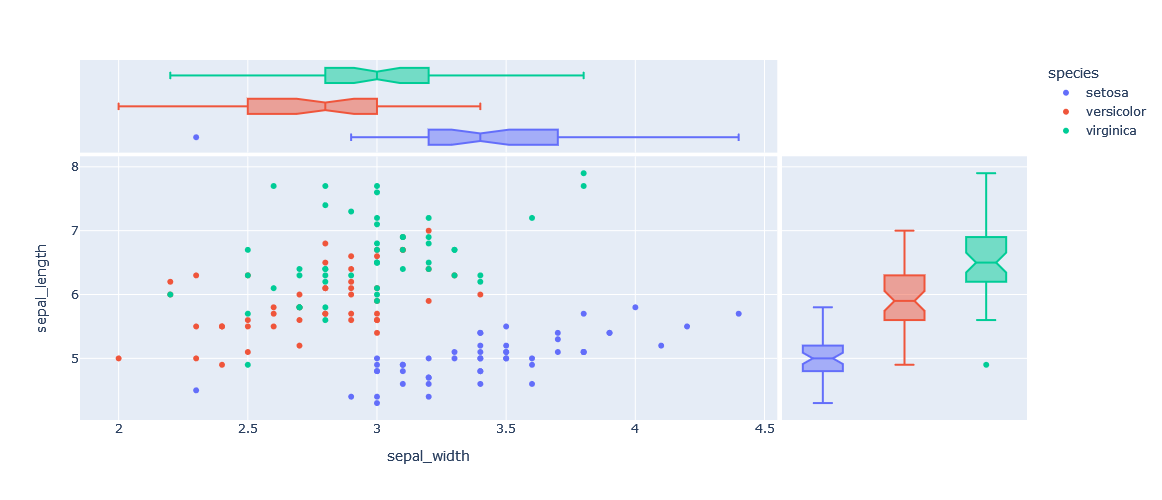

In [34]:
px.scatter(df, x='sepal_width', y='sepal_length', color='species', height=500, width=700, marginal_x='box', marginal_y='box')

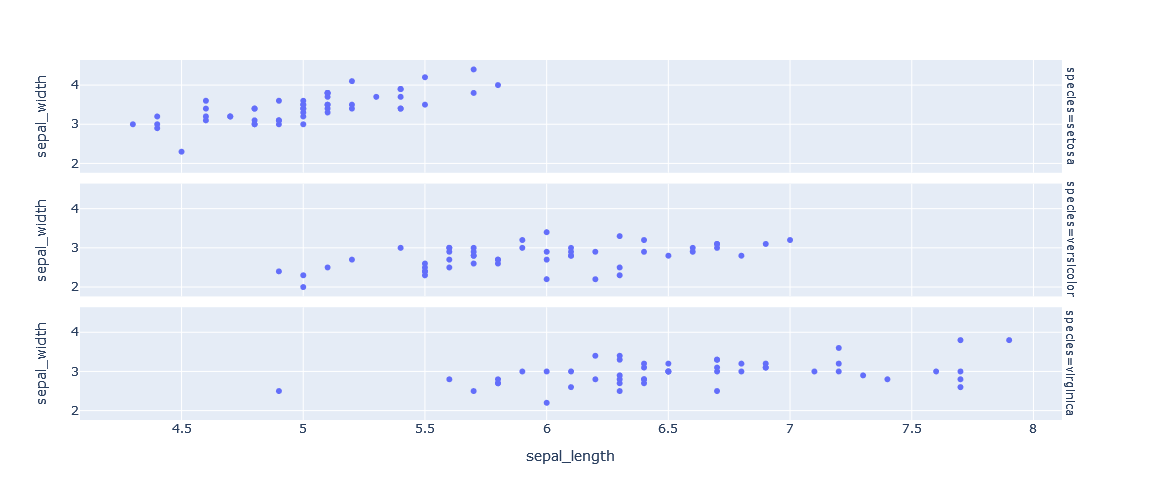

In [35]:
px.scatter(data_frame=df, x='sepal_length', y='sepal_width', facet_row='species', height=500, width=700)

We can modify the information available in the tooltip: 

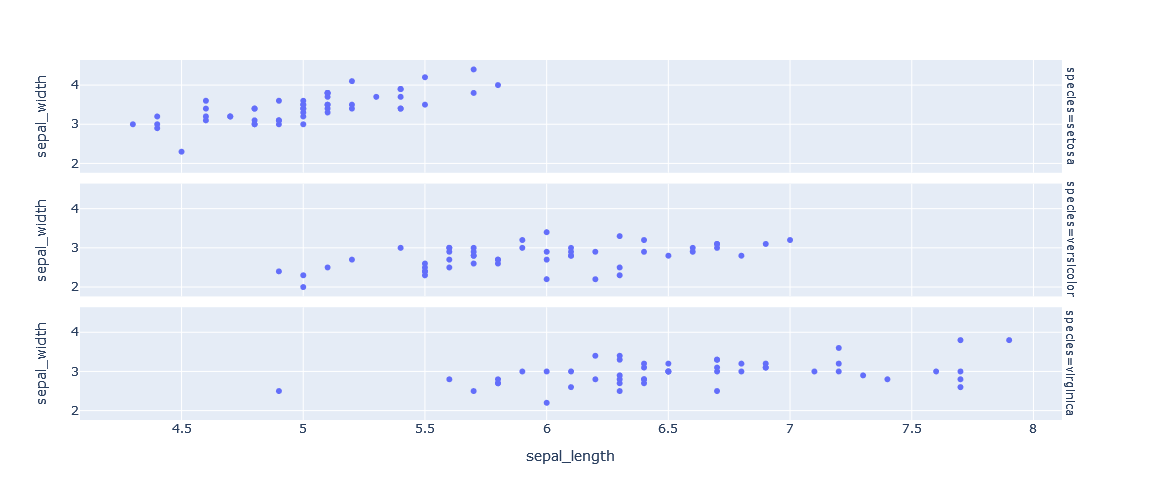

In [36]:
px.scatter(data_frame=df, x='sepal_length', y='sepal_width', facet_row='species', height=500, width=700,
          hover_data = ['petal_length', 'petal_width'])

We can even make density plots right in Plotly

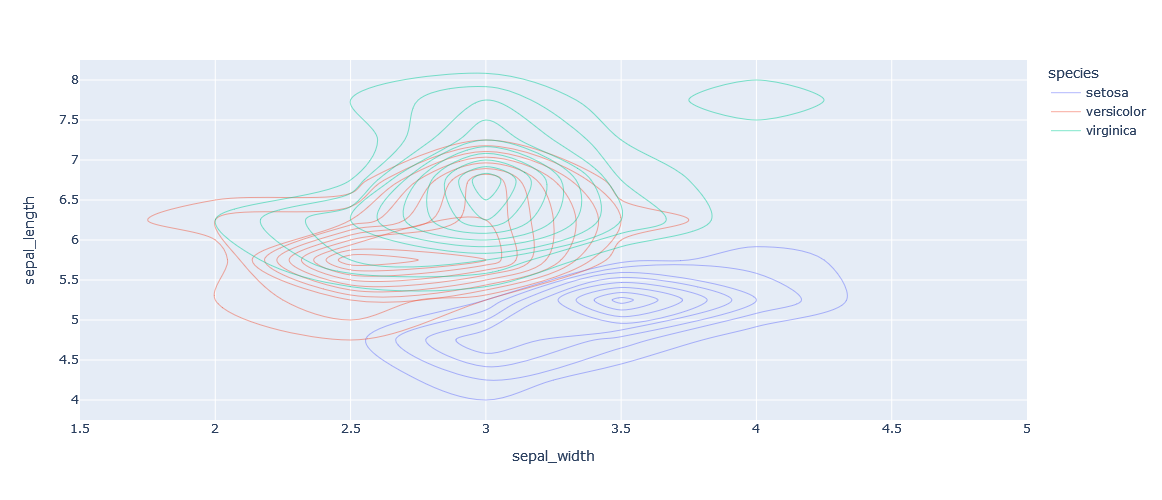

In [37]:
 px.density_contour(df, x="sepal_width", y="sepal_length", color='species', height=500, width=700)

### Animations
Plotly makes it very easy to create animations

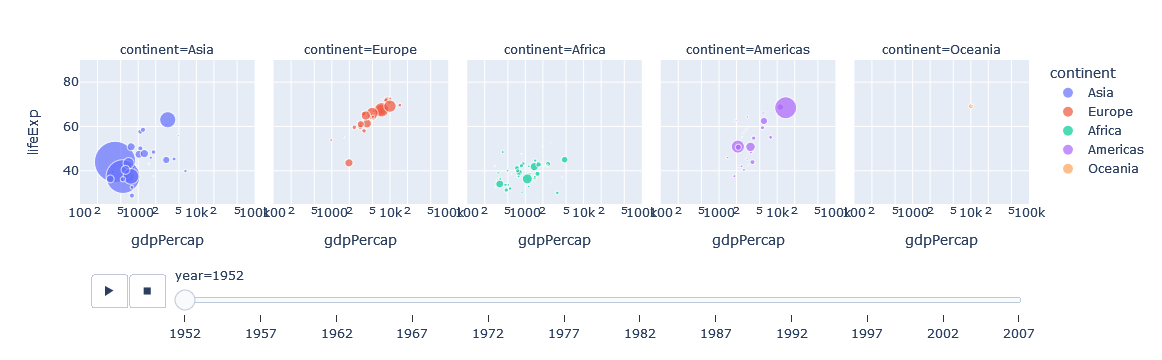

In [38]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

### Saving interactive plots
One of the great features of plotly is that you can save interactive features and run them in the browser. 

To demonstrate we will save the above interactive plot. Try opening the resulting html file in your browser. 

In [39]:
fig.write_html("animated_fig.html")